In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the Dataset

In [3]:
data=pd.read_csv("loan_data.csv")

In [4]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

Checking for Null Values and Duplicate Values and Filling if any.

In [6]:
data.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [7]:
data.duplicated().sum()

np.int64(0)

In machine learning:

X → input features (age, income, credit score, etc.)

y → output/label (loan approved or not)

So you're preparing the data for something like:

model.fit(X, y)

In [8]:
X = data.drop("loan_status", axis=1)
y = data["loan_status"]

Categorical columns:

person_gender

person_education

person_home_ownership

loan_intent

previous_loan_defaults_on_file

We convert them into numbers:

In [9]:
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include="object").columns
le = LabelEncoder()
for col in cat_cols:
    X[col] = le.fit_transform(X[col])


In [10]:
X.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0


# **Visualizations**

Class Distribution (Loan Status)

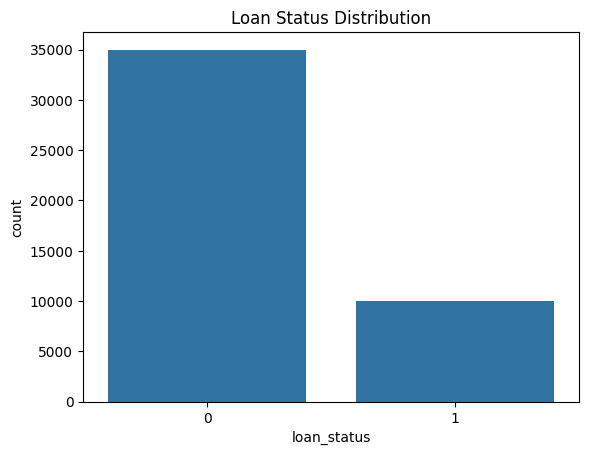

In [11]:
sns.countplot(x="loan_status", data=data)
plt.title("Loan Status Distribution")
plt.show()


Numerical Feature Distribution

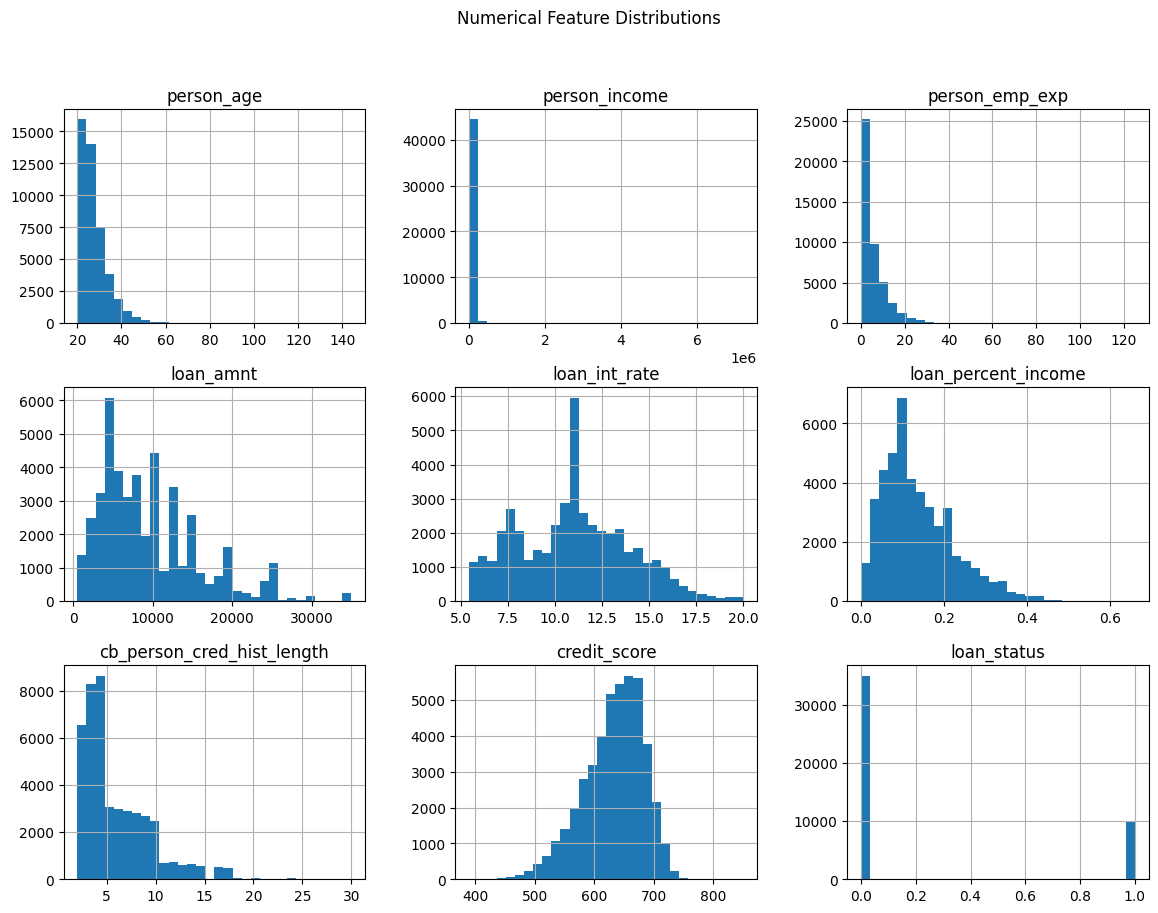

In [35]:
data.hist(bins=30, figsize=(14,10))
plt.suptitle("Numerical Feature Distributions")
plt.show()


Loan Intent vs Loan Status

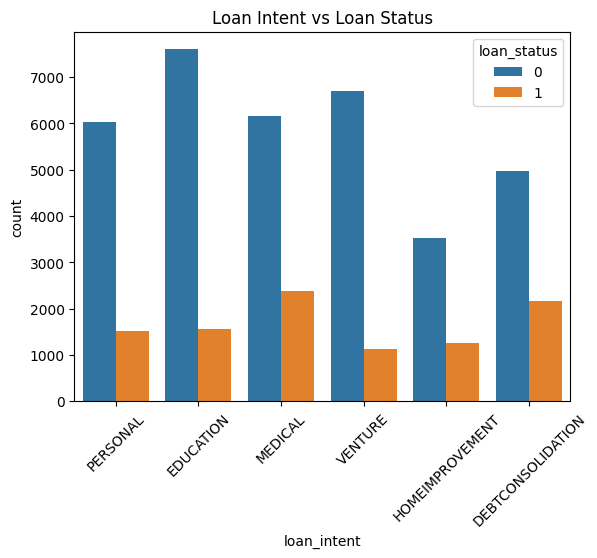

In [13]:
sns.countplot(x="loan_intent", hue="loan_status", data=data)
plt.xticks(rotation=45)
plt.title("Loan Intent vs Loan Status")
plt.show()


Home Ownership vs Loan Status

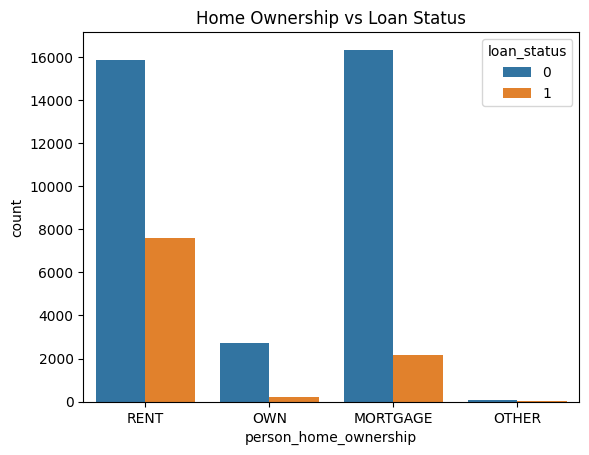

In [14]:
sns.countplot(x="person_home_ownership", hue="loan_status", data=data)
plt.title("Home Ownership vs Loan Status")
plt.show()


Loan Status vs Income

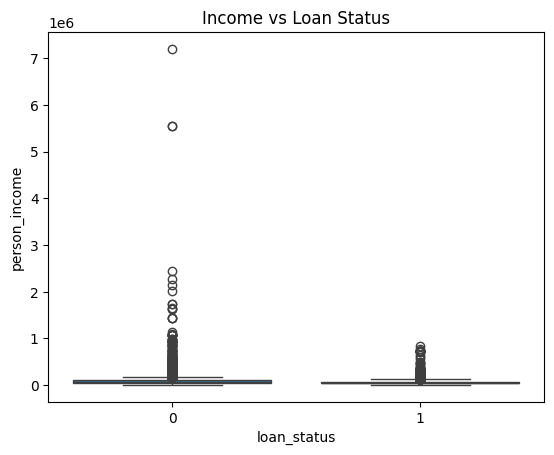

In [15]:
sns.boxplot(x="loan_status", y="person_income", data=data)
plt.title("Income vs Loan Status")
plt.show()


Correlation Heatmap

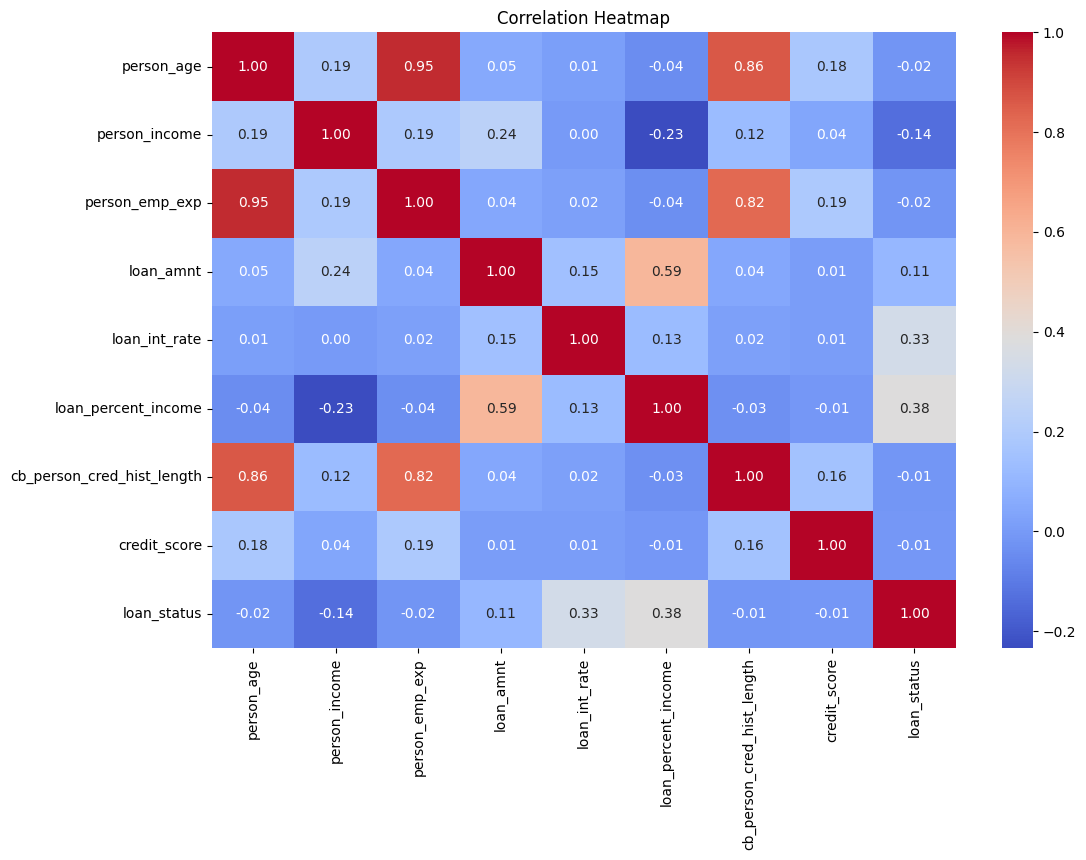

In [16]:

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# **ANN**
ANN Works well when the data is Normalized. So, we will do Feature Scaling.

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# Input + Hidden layer 1
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
# Hidden layer 2
model.add(Dense(32, activation='relu'))
# Output layer
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [21]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8626 - loss: 0.3068 - val_accuracy: 0.8989 - val_loss: 0.2189
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8977 - loss: 0.2197 - val_accuracy: 0.9017 - val_loss: 0.2131
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9029 - loss: 0.2108 - val_accuracy: 0.9026 - val_loss: 0.2107
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9067 - loss: 0.2074 - val_accuracy: 0.9015 - val_loss: 0.2091
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9058 - loss: 0.2055 - val_accuracy: 0.9065 - val_loss: 0.2056
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9060 - loss: 0.2026 - val_accuracy: 0.9060 - val_loss: 0.2027
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9102 - loss: 0.1962 - val_accuracy: 0.9067 - val_loss: 0.1999
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9100 - loss: 0.1954 - val_accuracy: 0.

In [36]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Test Accuracy:", accuracy)
print("Loss",loss)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0.3618
Test Accuracy: 0.8529999852180481
Loss 0.34923914074897766


In [23]:
y_pred = (model.predict(X_test) > 0.5).astype(int)


282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [37]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[6623  367]
 [ 460 1550]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6990
           1       0.81      0.77      0.79      2010

    accuracy                           0.91      9000
   macro avg       0.87      0.86      0.87      9000
weighted avg       0.91      0.91      0.91      9000

0.9081111111111111


Input layer → 13 features

Hidden layer 1 → 64 neurons (learn complex patterns)

Hidden layer 2 → 32 neurons

Output layer → 1 neuron (probability of loan_status)


**Training vs Validation Accuracy (ANN)**

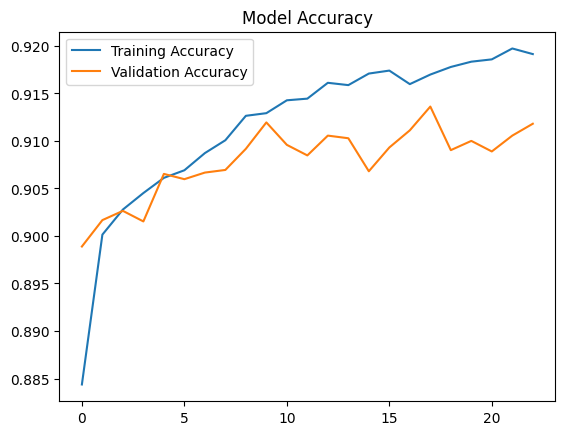

In [25]:
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.legend()
plt.show()


**Training vs Validation Loss**

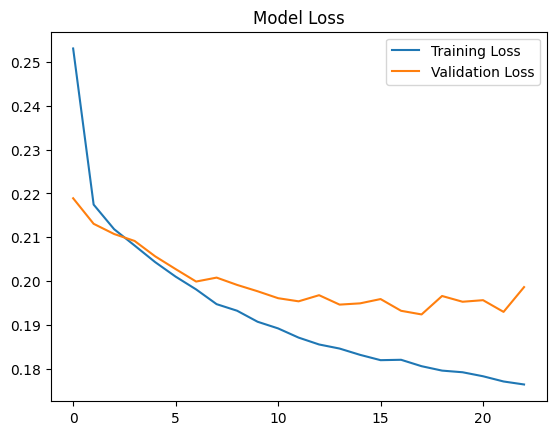

In [26]:
plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.legend()
plt.show()


**Confusion Matrix Heatmap**

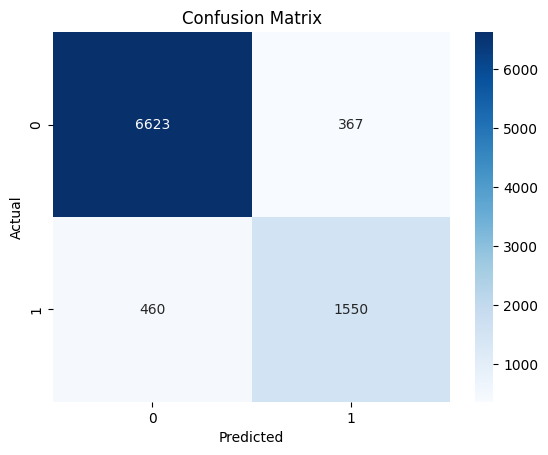

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


# **Prediction According to heatmap**

In [28]:
features = [
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
]

X = data[features]
y = data['loan_status']


In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [31]:
model = Sequential()

model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.fit(X_train, y_train,
          epochs=50,
          batch_size=32,
          validation_split=0.2)


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8148 - loss: 0.4454 - val_accuracy: 0.8386 - val_loss: 0.3756
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8414 - loss: 0.3699 - val_accuracy: 0.8406 - val_loss: 0.3723
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8462 - loss: 0.3620 - val_accuracy: 0.8385 - val_loss: 0.3712
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8465 - loss: 0.3646 - val_accuracy: 0.8404 - val_loss: 0.3689
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8431 - loss: 0.3684 - val_accuracy: 0.8396 - val_loss: 0.3672
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8450 - loss: 0.3638 - val_accuracy: 0.8446 - val_loss: 0.3666
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8427 - loss: 0.3727 - val_accuracy: 0.8404 - val_loss: 0.3661
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8455 - loss: 0.3612 - val_accuracy: 0.

In [39]:
loss, acc = model.evaluate(X_test, y_test)
print("Accuracy:", acc)
print("loss",loss)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8480 - loss: 0.3618
Accuracy: 0.8529999852180481
loss 0.34923914074897766


In [42]:
y_pred=(model.predict(X_test)>0.5).astype(int)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(round(accuracy_score(y_test,y_pred),2))

[[6486  504]
 [ 819 1191]]
0.85
